In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/company-bankruptcy-prediction/data.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/kaggle/input/company-bankruptcy-prediction/data.csv')  
df.fillna(df.median(), inplace=True)
df = pd.get_dummies(df)

scaler = StandardScaler()
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.35, random_state=42)

logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))

accuracies = {
    "Logistic Regression": logreg_accuracy,
    "Random Forest": rf_accuracy,
    "SVM": svm_accuracy,
    "KNN": knn_accuracy,
    "XGBoost": xgb_accuracy,
    "Gradient Boosting": gb_accuracy
}

print("\nModel Comparison:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9631336405529954
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2305
           1       0.41      0.17      0.24        82

    accuracy                           0.96      2387
   macro avg       0.69      0.58      0.61      2387
weighted avg       0.95      0.96      0.96      2387

Random Forest Accuracy: 0.9660661918726435
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2305
           1       0.53      0.12      0.20        82

    accuracy                           0.97      2387
   macro avg       0.75      0.56      0.59      2387
weighted avg       0.95      0.97      0.96      2387

SVM Accuracy: 0.9660661918726435
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      2305
  

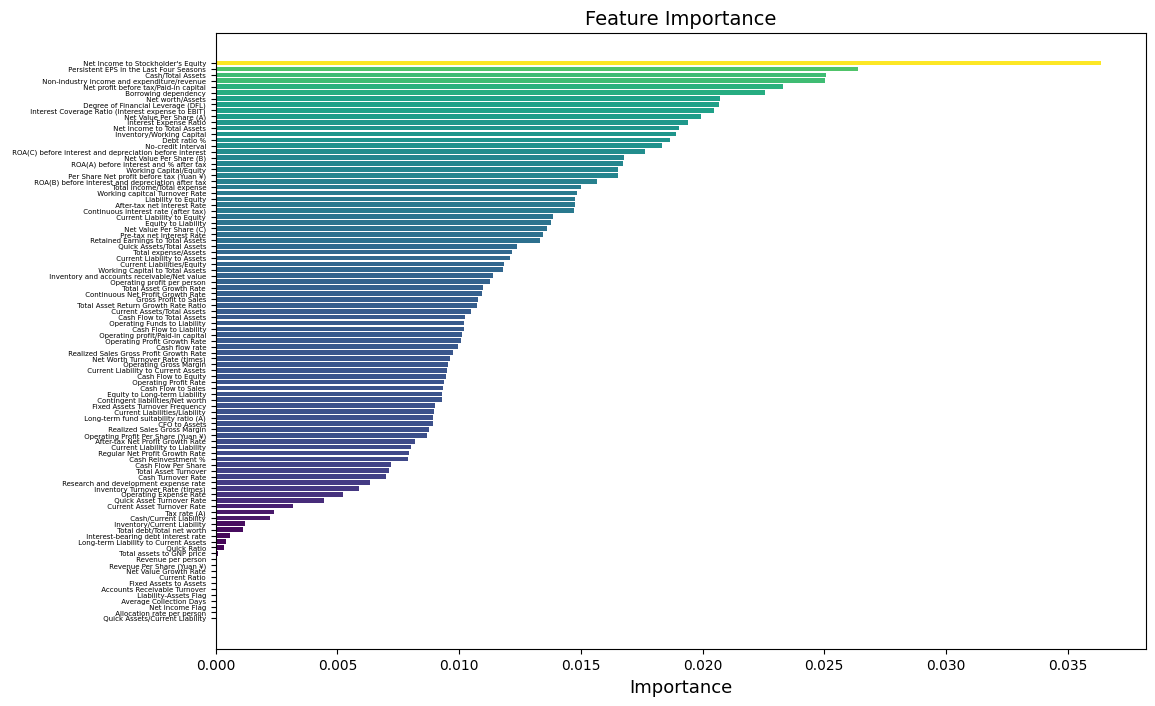

In [3]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,8))
plt.title("Feature Importance", fontsize=14)  # Smaller title font
plt.barh(range(X.shape[1]), importances[indices], align="center", color=plt.cm.viridis(importances[indices] / max(importances)))
plt.yticks(range(X.shape[1]), X.columns[indices], fontsize=5)  # Smaller y-tick font
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.xlabel("Importance", fontsize=13)  # Smaller x-label font
plt.show()
